![](http://blog.kaggle.com/wp-content/uploads/2014/07/wind.jpg)

# Feature Engineering

>  Feature Engineering is how you win

~ RJ de Texas (2015)

## Why do Feature Engineering?

Feature engineering is the process of transforming raw data into features that better represent the underlying problem to the predictive models, resulting in improved model accuracy on unseen data. Machine learning algorithms learn a solution to a problem from sample data. In this context, feature engineering asks: what is the best representation of the sample data to learn a solution to your problem?

![](assets/features-in-ML.jpg)

* Better features means **better results** - Since the success of all Machine Learning algorithms depends on how you present the data, better features will give you better results.
* Better features means **flexibility** - You can choose “the wrong models” (less than optimal) and still get good results. Most models can pick up on good structure in data. The flexibility of good features will allow you to use less complex models that are faster to run, easier to understand and easier to maintain. This is very desirable.
* Better features means **simpler models** - With well engineered features, you can choose “the wrong parameters” (less than optimal) and still get good results, for much the same reasons. You do not need to work as hard to pick the right models and the most optimized parameters. With good features, you are closer to the underlying problem and a representation of all the data you have available and could use to best characterize that underlying problem.

## Defining the Feature

Tabular data is described in terms of observations or instances (rows) that are made up of variables or attributes (columns). An attribute _could_ be a feature. The idea of a feature, separate from an attribute, makes more sense in the context of a problem. **A feature is an attribute that is useful or meaningful to your problem**. It is an important part of an observation for learning about the structure of the problem that is being modeled.

![](assets/62020_wl_compvision_fig1_wl.jpg)

In computer vision, an image is an observation, but a feature could be a line in the image. In natural language processing, a document or a tweet could be an observation, and a phrase or word count could be a feature. In speech recognition, an utterance could be an observation, but a feature might be a single word or phoneme.

### Feature Scoring 

You can objectively estimate the usefulness of features. This can be helpful as a pre-cursor to selecting features. Features are allocated scores and can then be ranked by their scores. Those features with the highest scores can be selected for inclusion in the training dataset, whereas those remaining can be ignored. **A feature may be important if it is highly correlated with the dependent variable** (the thing being predicted). Correlation coefficients and other univariate (each attribute is considered independently) methods are common methods.


### When to do Feature Engineering?

A picture relevant to our discussion on feature engineering is the stage at which it happens:

1. (tasks before here…)
1. **Select Data**: Integrate data, de-normalize it into a dataset, collect it together.
1. **Preprocess Data**: Format it, clean it, sample it so you can work with it.
1. **Transform Data**: Feature Engineer happens here.
1. **Model Data**: Create models, evaluate them and tune them.
1. (tasks after here…)

We may have to go back through these steps as we identify new perspectives on the data. For example, we may have an attribute that is an aggregate field, like a sum. Rather than a single sum, we may decide to create features to describe the quantity by time interval, such as season. We need to step backward in the process through `Preprocessing` and even `Selecting data` to get access to the “real raw data” and create this feature.

### How to approach Feature Engineering?

1. **Brainstorm features** : Really get into the problem, look at a lot of data, study feature engineering on other problems and see what you can steal.
1. **Devise features**: Depends on your problem, but you may use automatic feature extraction, manual feature construction and mixtures of the two.
1. **Select features**: Use different feature importance scorings and feature selection methods to prepare one or more “views” for your models to operate upon.
1. **Evaluate models**: Estimate model accuracy on unseen data using the chosen features.

## Feature Selection

Those attributes that are irrelevant to the problem need to be removed. There will be some features that will be more important than others to the model accuracy. There will also be features that will be redundant in the context of other features. Feature selection addresses these problems by **automatically selecting a subset that are most useful to the problem**. Feature selection algorithms may use a scoring method to rank and choose features, such as correlation or other feature importance methods.

### Remove Redundant Features

Data can contain attributes that are highly correlated with each other. Many methods perform better if highly correlated attributes are removed. We'll write a function, `findCorrelation` which will analyze a correlation matrix of your data’s attributes report on attributes that can be removed.

The following example loads the Pima Indians Diabetes dataset that contains a number of biological attributes from medical reports. A correlation matrix is created from these attributes and highly correlated attributes are identified.

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
# URL for the Pima Indians Diabetes dataset (UCI Machine Learning Repository)
url = "http://goo.gl/j0Rvxq"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
# download the file
df = pd.read_csv(url, names=names)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
preg     768 non-null int64
plas     768 non-null int64
pres     768 non-null int64
skin     768 non-null int64
test     768 non-null int64
mass     768 non-null float64
pedi     768 non-null float64
age      768 non-null int64
class    768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


#### Attribute Information:

1. Number of times pregnant 
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test 
3. Diastolic blood pressure (mm Hg) 
4. Triceps skin fold thickness (mm) 
5. 2-Hour serum insulin (mu U/ml) 
6. Body mass index (weight in kg/(height in m)^2) 
7. Diabetes pedigree function 
8. Age (years) 
9. Class variable (0 or 1) 

In [3]:
corr = df.corr()
df.corr()

,preg,plas,pres,skin,test,mass,pedi,age,class
preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
plas,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
pres,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
test,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
mass,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedi,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
class,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [4]:
corr.shape

(9, 9)

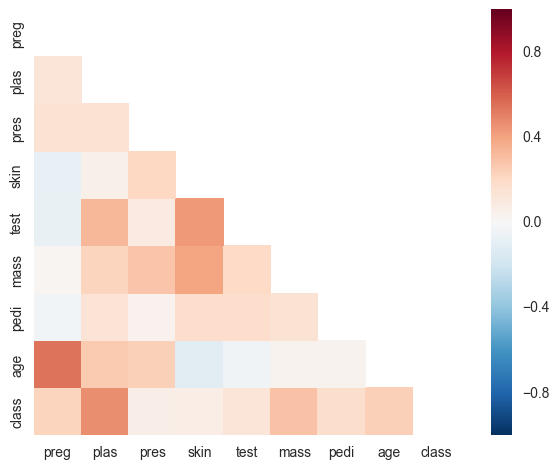

In [5]:
%matplotlib inline
import numpy as np
import seaborn as sns

corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, square=True)

In [6]:
def findCorrelation(df, threshold=0.9):
    cor = df.corr()
    cor.loc[:,:] = np.tril(cor.values, k=-1)
#     print cor.head(10)
    cor = cor.stack()
#     print cor.head(10)
    return cor[abs(cor) > threshold].sort_values(ascending=False)

In [7]:
findCorrelation(df,0.2)

age    preg    0.544341
class  plas    0.466581
test   skin    0.436783
mass   skin    0.392573
test   plas    0.331357
class  mass    0.292695
mass   pres    0.281805
age    plas    0.263514
       pres    0.239528
class  age     0.238356
       preg    0.221898
mass   plas    0.221071
skin   pres    0.207371
dtype: float64

in this case the preg attribute is remove as it correlates highly with the age attribute.

Generally, you want to remove attributes with an absolute correlation of 0.9 or higher.

### Rank Features By Importance

The importance of features can be estimated from data by building a model. Some methods like decision trees have a built in mechanism to report on variable importance. For other algorithms, the importance can be estimated using a ROC curve analysis conducted for each attribute.

The example below loads the Pima Indians Diabetes dataset and constructs an ExtraTrees (ET) model. The `feature_importances_` is then used to estimate the variable importance, which is printed and plotted.

In [8]:
# df.ix[:, [1, 7, 5, 6, 0, 2, 3, 4]].columns

Feature ranking:
1. feature plas (0.234831)
2. feature age (0.142939)
3. feature mass (0.141744)
4. feature pedi (0.118192)
5. feature preg (0.110135)
6. feature pres (0.098548)
7. feature skin (0.079218)
8. feature test (0.074393)


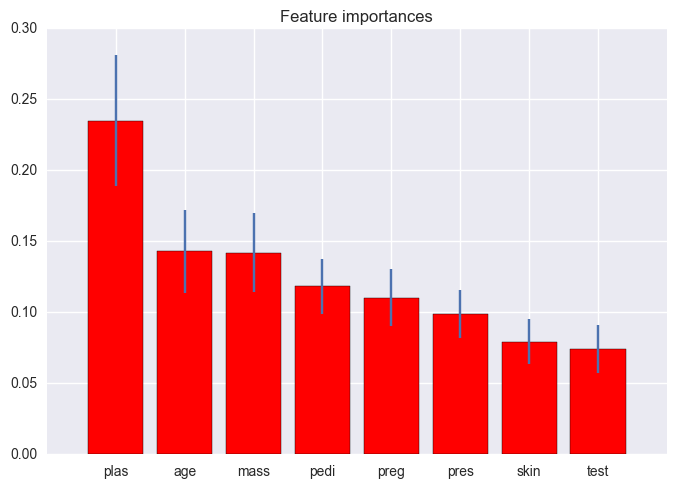

In [9]:
import matplotlib.pyplot as plt

from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier

# Build a classification task
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=2500,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_

std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)

indices = np.argsort(importances)[::-1]

x_labels = df.ix[:, indices].columns

# Print the feature ranking
print "Feature ranking:"

for f in xrange(8):
    print "%d. feature %s (%f)" % (f + 1, x_labels[f], importances[indices[f]])

# Plot the feature importances of the forest

plt.figure()
plt.title("Feature importances")
plt.bar(xrange(8), importances[indices],
       color="r", yerr=std[indices], align="center")


plt.xticks(xrange(8), x_labels)
plt.xlim([-1, 8])
plt.xticks;

The higher, the more important the feature. The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance

It shows that the `plas`, `age` and `mass` attributes are the top 3 most important attributes in the dataset and the `test` attribute is the least important.

### Automatic Feature Selection

Automatic feature selection methods can be used to build many models with different subsets of a dataset and identify those attributes that are and are not required to build an accurate model. A popular automatic method for feature selection provided by SciKit Learn which is called **Recursive Feature Elimination Cross Validation** (RFECV).

The example below provides an example of the RFE method on the Pima Indians Diabetes dataset. A Random Forest algorithm is used on each iteration to evaluate the model. The algorithm is configured to explore all possible subsets of the attributes. All 8 attributes are selected in this example, although in the plot showing the accuracy of the different attribute subset sizes, we can see that just 4 attributes gives almost comparable results.

In [10]:
RFECV??

Object `RFECV` not found.


In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV

rf = RandomForestClassifier(n_estimators=50, min_samples_leaf=5, n_jobs=-1)

rfecv = RFECV(estimator=rf, step=1, cv=3, scoring='roc_auc', verbose=2)

selector = rfecv.fit(X, y)

Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.


In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV

class RandomForestClassifierWithCoef(RandomForestClassifier):
    def fit(self, *args, **kwargs):
        super(RandomForestClassifierWithCoef, self).fit(*args, **kwargs)
        self.coef_ = self.feature_importances_

rf = RandomForestClassifierWithCoef(n_estimators=50,
                                        min_samples_leaf=5, n_jobs=-1)

rfecv = RFECV(estimator=rf, step=1, cv=3, scoring='roc_auc', verbose=2)

selector = rfecv.fit(X, y)

Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.


In [13]:
selector.n_features_

8

In [14]:
selector.support_

array([ True,  True,  True,  True,  True,  True,  True,  True], dtype=bool)

Here we've selected all features. Now let's try this on a synthetic dataset to show you what happens when features are dropped. The regression problem Friedman 1. Inputs are 10 independent variables uniformly distributed on the interval [0,1], only 5 out of these 10 are actually used. 

$$y = 10 sin(π x_1 x_2) + 20 (x_3 - 0.5)^2 + 10 x_4 + 5 x_5 + e$$

In [15]:
from sklearn.datasets import make_friedman1
from sklearn.svm import SVR

X, y = make_friedman1(n_samples=50, n_features=10, random_state=0)

estimator = SVR(kernel="linear")

from sklearn.tree import DecisionTreeClassifier as DT

dt = DecisionTreeClassifier

estimator = SVR(kernel="linear")
selector = RFECV(estimator, step=1, cv=5)
selector.fit(X, y)

print selector.n_features_
print selector.support_ 
print selector.ranking_

NameError: name 'DecisionTreeClassifier' is not defined

In [ ]:
est = SVR(kernel="linear")
est.fit(X,y)
est.score(X,y)

In [ ]:
est.coef_

In [ ]:
friedman = pd.DataFrame(X)
friedman['y'] = y 

corr = friedman.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, square=True)

## Feature Extraction

Some observations are far too voluminous in their raw state to be modeled by predictive modeling algorithms directly. Feature extraction is a process of automatically reducing the dimensionality of these types of observations into a much smaller set that can be modelled. For tabular data, this might include projection methods like **Principal Component Analysis** and unsupervised **Clustering** methods.

## Clustering

### Clustering for Understanding

* Market Segmentation
* [Social Network Analysis](https://immersion.media.mit.edu/viz)
* Organising Computing Clusters
* Astronomical Data Analysis

#### Clustering for Utility

* Summarization
* Compression
* Efficiently Finding Nearest Neighbours

### Approach

Think of a cluster as a “potential class”; then the solution to a clustering problem is to programatically determine these classes. The real purpose of clustering is data exploration, so a solution is anything that contributes to your understanding.

### $K$-Means Clustering

A greedy learner that partitions a data set into $k$ clusters.

* *greedy* – captures local structure (depends on initial conditions)
* *partition* – performs complete clustering (each point belongs to
exactly one cluster)



### Partitions

Each point is assigned to the cluster with the nearest centroid.

*centroid* – the mean of the data points in a cluster
  * requires continuous (vector-like) features, though see [TopSig](http://eprints.qut.edu.au/43451/) for a binary implementation
  * highlights iterative nature of algorithm

In [ ]:
from IPython.display import HTML
HTML('<iframe src="http://bl.ocks.org/mbostock/raw/4060366/" width=820 height=500></iframe>')

These partitions are sometimes called _Voronoi cells_, and these maps _Voronoi diagrams_.

![](assets/plot_kmeans_digits_1.png)

One important point to keep in mind is that partitions are not scale-invariant! This means that the same data can yield very different clustering results depending on the scale and the units used. Therefore it’s important to think about your data representation before applying a clustering algorithm.

These graphs show two different representations of the same data:

![](assets/kmeans_scale.png)

#### How the $K$-means algorithm works

![](assets/kmeans.gif)

1. Selects $K$ centroids ($K$ rows chosen at random)
1. Assigns each data point to its closest centroid
1. Recalculates the centroids as the average of all data points in a cluster (i.e., the centroids are p-length mean vectors, where p is the number of variables)
1. Assigns data points to their closest centroids
1. Continues steps 3 and 4 until the observations are not reassigned or the maximum number of iterations (SciKit uses 300 as a default) is reached.

Implementation details for this approach can vary.

![](assets/kmeans.png)

#### $K$-Means in SciKit Learn

Since K-means cluster analysis starts with `k` randomly chosen centroids, a different solution can be obtained each time the function is invoked. Use the `random.seed(n)` function to guarantee that the results are reproducible. Additionally, this clustering approach can be sensitive to the initial selection of centroids. The `KMeans()` class has an `n_init` parameter that attempts multiple initial configurations and reports on the best one. For example, adding `n_init=25` will generate `25` initial configurations. This approach is often recommended.

### Properties

* K-means is algorithmically pretty efficient (time & space complexity is linear in number of records).
* It has a hard time dealing with non-[convex clusters](http://pafnuty.wordpress.com/2013/08/14/non-convex-sets-with-k-means-and-hierarchical-clustering/), or data with widely varying shapes and densities.

![](assets/intclusoutnonfastclus.png)

* Clustering binary data with K-Means [(should be avoided)](http://www-01.ibm.com/support/docview.wss?uid=swg21477401). K-means will produce means that are no longer binary. Frequent itemset mining may be a better choice in that case.
* Difficulties can sometimes be overcome by increasing the value of k and combining subclusters in a post-processing step.

### STEP 1 – CHOOSING INITIAL CENTROIDS

How do you choose the initial centroid positions?
* Randomly (but may yield divergent behavior)
![](assets/K-means_convergence_to_a_local_minimum.png)
* Perform alternative clustering task, use resulting centroids as initial k-means centroids
* Start with global centroid, choose point at max distance, repeat (but might select outlier)

### STEP 2 – SIMILARITY MEASURES

How do you determine which centroid is the nearest?
* The “nearness” criterion is determined by the similarity/distance measure we discussed earlier. This measure makes quantitative inference possible. (Technically, by defining a similarity measure we are mapping our observations into a metric space.)
* A similarity measure must satisfy certain general conditions:

$$d(x,y) \geq 0$$

$$d(x,y) = 0 \longleftrightarrow x = y$$

$$d(x,y) = d(y,x) \\ \text{(symmetry)}$$

$$d(x,y) + d(y,z) \geq d(x,z) \\\text{(triangle inequality)}$$

* There are a number of different [similarity measures](http://ag.arizona.edu/classes/rnr555/lecnotes/10.html) to choose from, and in general the right choice depends on the problem.
  * For data that takes values in $R^n$ , the typical choice is the [Euclidean distance](http://en.wikipedia.org/wiki/Euclidean_distance):
  
  $$ d(p,q) = d(q,p) = \sqrt{(p_1 - q_1)^2 + (p_2 - q_2)^2 + \dots + (p_n -q_n)^2} = \sqrt{\sum\limits_{i=1}^n(q_{i}-p_{i})^2 }$$
  
  * The use of the Manhattan distance is advised in those situations where for example a difference of 1 in the first variable,and of 3 in the second variable is the same as a difference of 2 in the first variable and of 2 in the second:
  
     $$\sum\limits_{i=1}^n(|q_{i}-p_{i}|)$$

* We can express different semantics about our data through the choice of metric. Ex: One popular metric for text mining problems (or any problem with sparse binary data) is the [Jaccard Coefficient](http://matpalm.com/resemblance/jaccard_coeff/)].

$$J(A,B) = \frac{A\cap B}{A\cup B}$$

the jaccard index is a simple measure of how similiar two sets are.
it's simply the ratio of the size of the intersection of the sets and the size of the union of the sets.

eg. 

    if J(A,B) is jaccard index between sets A and B
    and A = {1,2,3}, B = {2,3,4}, C = {4,5,6},
    then J(A,B) = 2/4 = 0.5,
    and J(A,C) = 0/6 = 0,
    and J(B,C) = 1/5 = 0.2

so the most "similiar" sets are A and B and the least similiar are A and C
(note also J(A,A) = J(B,B) = J(C,C) = 1)

* Applying this metric to a problem expresses the sparse nature of the data, and makes a variety of text mining techniques accessible.

The matrix whose entries $D_{ij}$ contain the values $d(x, y)$ for all $x$ and $y$ is called the distance matrix. The distance matrix contains all of the information we know about the dataset. For this reason, it’s really the choice of metric that determines the definition of a cluster.

### STEP 3 – OBJECTIVE FUNCTION

We need to recompute the positions of the centroids at each iteration of the algorithm. We do so by optimizing an objective function that tells us how “good” the clustering is. The iterative part of the algorithm (recomputing centroids and reassigning points to clusters) explicitly tries to minimize this objective function.

Ex: Using the Euclidean distance measure, one typical objective function is the sum of squared errors from each point $x$ to its centroid $c_i$ :

$$ SSE = \sum\limits_{i=1}^k \sum\limits_{x\in C_{i}} d(x,c_{i})^2 $$

Given two clusterings, we will prefer the one with the lower SSE since this means the centroids have converged to better locations (a better local optimum).

### STEP 4 – CONVERGENCE

We iterate until some stopping criteria are met; in general, suitable convergence is achieved in a small number of steps. Stopping criteria can be based on the centroids (eg, if positions change by no more than $e$) or on the points (eg, if no more than $x$% change clusters between iterations). Recall that, in general, different runs of the algorithm will converge to different local optima (centroid configurations).

## Cluster Validation

In general, k-means will converge to a solution and return a partition of $k$ clusters, even if no natural clusters exist in the data. We will look at two validation metrics useful for partitional clustering, *cohesion* and *separation*.

### Cohesion and separation


![](assets/separationcohesion.png)

*Cohesion* measures clustering effectiveness within a cluster.

$$ \hat{C}(C_{i}) = \sum\limits_{x \in C_i} d(x,c_{i}) $$ 

*Separation* measures clustering effectiveness between clusters.

$$ \hat{S}(C_{i},C_{j}) = d(c_{i},c_{j}) $$ 

We can turn these values into overall measures of clustering validity by taking a weighted sum over clusters:

$$ \hat{V}_{total} = \sum\limits_{1}^K w_{i}\hat{V}(C_{i}) $$

Here $V$ can be cohesion, separation, or some function of both. The weights can all be set to $1$ (best for k-means), or proportional to the cluster masses (the number of points they contain).

Cluster validation measures can be used to identify clusters that should be split or merged, or to identify individual points with disproportionate effect on the overall clustering.

### Silhouette Coefficient

One useful measure than combines the ideas of cohesion and separation is the [silhouette coefficient](http://pafnuty.wordpress.com/2013/02/04/interpretation-of-silhouette-plots-clustering/). For an individual point $x_i$ , this is given by:

$$ SC_{i} = \frac{b_{i}-a_{i}}{max(a_{i},b_{i})} \\
\begin{align*}
\text{such that}&: \\
& a_{i} = \text{average distance to the points of its own cluster from } x_{i} \\
& b_{i} = \text{average distance to the points of the nearest-cluster from } x_{i}\\
\end{align*}$$

The silhouette coefficient can take values between -1 and 1. In general, we want separation to be high and cohesion to be low. This corresponds to a value of SC close to +1. A negative silhouette coefficient means the cluster radius is larger than the space between clusters, and thus clusters overlap.

![](assets/silhouettegraph.png)

The silhouette coefficient for the cluster $C_i$ is given by the average silhouette coefficient across all points in $C_i$, where $m_{i}$ is the number of points in a cluster :

$$ SC(C_{i}) = \frac{1}{m_{i}} \sum \limits_{x \in C_{i}} SC_{i} $$

The overall silhouette coefficient is given by the average silhouette coefficient across all points:

$$ SC_{total} = \frac{1}{k} \sum \limits_{1}^{k} SC(C_{i}) $$

This gives a summary measure of the overall clustering quality.

### Similarity Matrix

An alternative validation scheme is given by comparing the similarity matrix with an idealized $(0/1)$ similarity matrix that represents the same clustering configuration. This can be done either graphically or using correlations.

![](assets/similaritymatrix.png)

One useful application of cluster validation is to determine the best number of clusters for your dataset. We can do this by computing the overall SSE or [intepreting the Silhouette Coefficient](http://pafnuty.wordpress.com/2013/02/04/interpretation-of-silhouette-plots-clustering/) for different values of K.

![](assets/cluster_validation.png)

To determine your level of confidence in these validation metrics, we use rely on our statistical methods, eg, by computing frequency distributions for these metrics (over several runs of the algorithm) and determining statistical significance.

Ultimately, cluster validation and clustering in general are suggestive techniques that rely on human interpretation to be meaningful.

![break](assets/code.png)

## Implementing K-Means

* See a very basic example of K-means applied to a clear data set
* Work through an implementation of predicting the classes in the iris data set
* Application to data we're using

In [3]:
%matplotlib inline
from numpy import random
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Don't show deprecation warnings
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

# Set some Pandas options
pd.set_option('max_columns', 30)
pd.set_option('max_rows', 20)

# Set some Matplotlib options
matplotlib.rcParams.update({'font.size': 20})
matplotlib.rcParams['figure.figsize'] = 14, 8

# Store data in a consistent place
DATA_DIR = 'data/'

### K-Means with good data

First things first, let's look at a readable and good application of kmeans with made up data:

In [16]:
random.random(20) + 1

NameError: name 'random' is not defined

In [17]:
# load modules
from sklearn import cluster
from numpy import random
from pandas import DataFrame, concat
from matplotlib import pyplot as plt

random.seed(1)

classone = DataFrame({
    'x' :random.random(20) + 1,
    'y' : random.random(20) + 1,
    'label' : ['r' for i in range(20)]
})
classtwo = DataFrame({
    'x' :random.random(20) + 1,
    'y' : random.random(20) + 3,
    'label' : ['g' for i in range(20)]
})
classthree = DataFrame({
    'x' :random.random(20) + 3,
    'y' : random.random(20) + 1,
    'label' : ['b' for i in range(20)]
})
classfour = DataFrame({
    'x' :random.random(20) + 3,
    'y' : random.random(20) + 3,
    'label' : ['purple' for i in range(20)]
})

data = concat([classone, classtwo, classthree, classfour])
data.describe()

,x,y
count,80.000000,80.000000
mean,2.460389,2.509017
std,1.104095,1.003107
min,1.000114,1.015821
25%,1.383966,1.691632
50%,2.495866,2.504939
75%,3.564193,3.439357
max,3.969596,3.970020


In [18]:
data.iloc[50:70]

,label,x,y
10,b,3.114746,1.172341
11,b,3.949489,1.137136
12,b,3.449912,1.932595
13,b,3.578390,1.696818
14,b,3.408137,1.066000
15,b,3.237027,1.755463
16,b,3.903380,1.753876
17,b,3.573679,1.923025
18,b,3.002870,1.711525
19,b,3.617145,1.124271


A quick scatter shows that yes, these are easy identifiable clusters.

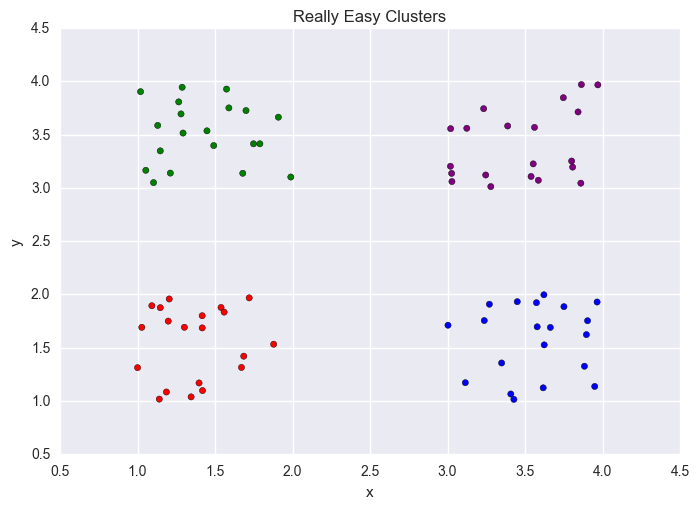

In [19]:
data.plot(kind='scatter', x='x', y='y', c=data.label);
plt.title('Really Easy Clusters');

In [20]:
cls = cluster.k_means(data[ ['x', 'y'] ].values, 4)

In [21]:
print cls

(array([[ 3.47459732,  3.39687035],
       [ 1.36728075,  1.55126409],
       [ 3.56427383,  1.5767669 ],
       [ 1.43540531,  3.51116565]]), array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32), 14.3621195486022)


Printing cls returns two arrays and a float.
The first array is 'x' and 'y' for the centrioids of each cluster.
The second array is the cluster values.
The float represents the inertia.

In [22]:
data['clusters'] = cls[1]

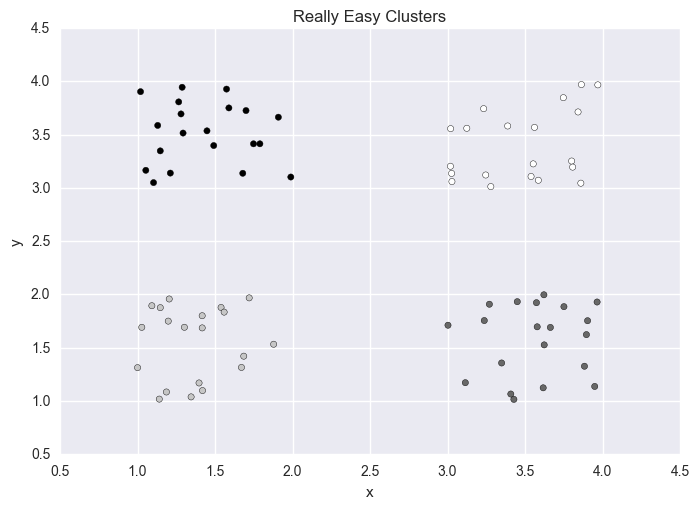

In [23]:
data.plot(kind='scatter', x='x', y='y', c=data.clusters);
plt.title('Really Easy Clusters');

What happens when we introduce a new length of cluster?

In [24]:
classfive = DataFrame({
    'x' : random.random(50) * 50 + 100,
    'y' : random.random(50) * 50 + 100,
    'label' : ['orange' for i in range(50)]
})

In [25]:
(classfive[['x','y']] - classfive[['x','y']].mean() ) / classfive[['x','y']].std()

,x,y
0,0.828098,1.338616
1,1.264075,1.315274
2,0.848471,-0.968218
3,0.618892,-1.479941
4,1.288897,-1.192731
5,-0.892349,-0.119706
6,0.509111,0.681688
7,-0.376253,-1.139428
8,-0.653121,-1.000010
9,-0.537542,1.112429


In [26]:
data_denorm = concat([data, classfive])

In [27]:
cls = cluster.k_means(data_denorm[ ['x', 'y'] ].values, 5)

In [28]:
data_denorm['clusters'] = cls[1]

In [29]:
cls[0]

array([[   2.4603893 ,    2.50901675],
       [ 114.59473758,  133.74364301],
       [ 138.0721944 ,  138.93523368],
       [ 119.75832136,  110.9337973 ],
       [ 137.24093568,  110.6689053 ]])

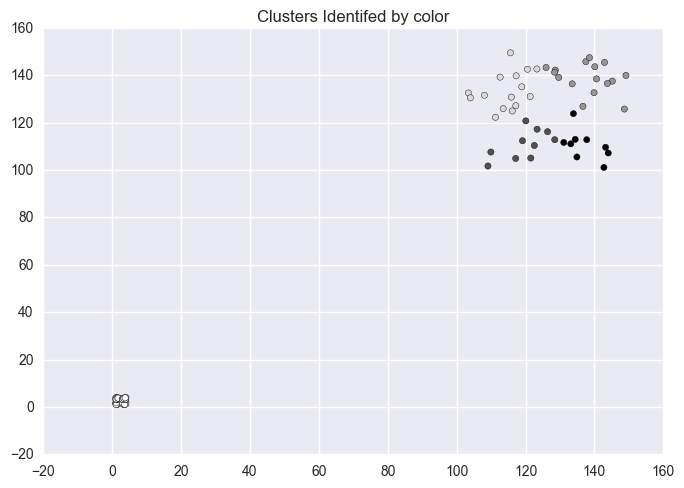

In [30]:
plt.scatter(data_denorm.x.values, data_denorm.y.values, c=data_denorm.clusters)
plt.title('Clusters Identifed by color');

### Iris 

In [31]:
## Iris Data Application
from sklearn import datasets
iris = datasets.load_iris()
cls = cluster.k_means([x[2:] for x in iris.data], 3)
print cls

(array([[ 4.26923077,  1.34230769],
       [ 1.464     ,  0.244     ],
       [ 5.59583333,  2.0375    ]]), array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32), 31.387758974359009)


Compare the results here. How did K-means do without any data changes?

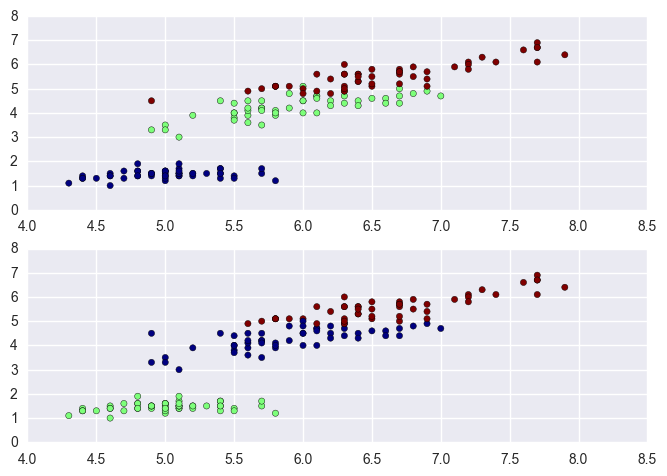

In [32]:
import matplotlib.pyplot as plt

plt.subplot(211)
plt.scatter(iris.data[:,:1], iris.data[:, 2:3], cmap=plt.cm.jet, c=iris.target)
plt.subplot(212)
plt.scatter(iris.data[:,:1], iris.data[:, 2:3], cmap=plt.cm.jet, c=list(cls[1]));

Now calculate the Silhouette Coefficient for the total cluster.

In [33]:
from sklearn.metrics import silhouette_score

silhouette_score(iris.data, cls[1])

0.52194621307828026

### Classwork

Analyze a dataset containing 13 chemical measurements on 178 Italian wine samples. Get the data from the [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/datasets/Wine).

* What is the optimal number of clusters?
* What determines what clusters consist of?
* How well did the K-means clustering uncover the actual structure of the data contained in the first column?

![break](assets/resources.png)

## Resources

### Handbook

![resource](assets/intro_to_data_mining.png)[Introduction to Data Mining (Ch. 8)](http://www-users.cs.umn.edu/~kumar/dmbook/index.php)

### Academic

* [An implementation of the relational k-means algorithm](http://arxiv.org/abs/1304.6899)
* [An efficient k-means algorithm integrated with Jaccard distance measure for document clustering](http://ieeexplore.ieee.org/xpl/login.jsp?tp=&arnumber=5340335&url=http%3A%2F%2Fieeexplore.ieee.org%2Fxpls%2Fabs_all.jsp%3Farnumber%3D5340335)

### Packages

* [SciKit Clusting](http://scikit-learn.org/stable/modules/clustering.html)
* [sklearn.cluster.KMeans](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

### Examples

* [Blogpost on Insult Detection](http://blog.kaggle.com/2012/09/26/impermium-andreas-blog/)
* [Github Code of Insult Detection Solution](https://github.com/amueller/kaggle_insults/)
* [Choosing a ML Classifier](http://blog.echen.me/2011/04/27/choosing-a-machine-learning-classifier/)
* [KMeans IPython Notebook](http://nbviewer.ipython.org/urls/raw.github.com/temporaer/tutorial_ml_gkbionics/master/2%2520-%2520KMeans.ipynb)
* [Cloudera ML KMeans](http://blog.cloudera.com/blog/2013/03/cloudera_ml_data_science_tools/)